In [1]:
import pandas as pd
from matplotlib import pyplot as plt

####  Identify Potential Outliers

Look at the min, max, and std (standard deviation) values in the summary statistics. Outliers can be suspected if:

    The max value is significantly higher than the 75% (third quartile) value.
    The min value is significantly lower than the 25% (first quartile) value.
    The range (max - min) is much larger than the interquartile range (75% - 25%).

In [2]:
df = pd.read_csv(r"C:\Users\HP\Maths and statistics course codebasics\files\chapter4_assets\4_shoe_sale_analysis\shoe_sales.csv")
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [4]:
df.shape

(60, 3)

In [5]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [6]:
df[df.sold_qty<12.25]                         # row that sold quantity les thm 12.25

,date,brand,sold_qty
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
9,9/5/2023,Adidas,10.0
15,9/8/2023,Adidas,8.0
19,9/10/2023,Adidas,7.0
21,9/11/2023,Adidas,9.0
25,9/13/2023,Adidas,11.0
29,9/15/2023,Adidas,10.0
33,9/17/2023,Adidas,8.0
37,9/19/2023,Adidas,7.0


### (1) Nike Analysis

In [16]:
df[df["brand"] =="Nike"]

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
2,9/2/2023,Nike,21.0
4,9/3/2023,Nike,18.0
6,9/4/2023,Nike,22.0
8,9/5/2023,Nike,20.0
10,9/6/2023,Nike,23.0
12,9/7/2023,Nike,19.0
14,9/8/2023,Nike,17.0
16,9/9/2023,Nike,25.0
18,9/10/2023,Nike,14.0


In [19]:
df_nike = df[df.brand == "Nike"]
df_nike.shape

(30, 3)

In [20]:
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [21]:
df_nike.sold_qty.mean()             

19.642857142857142

In [23]:
df_nike.isnull()                       #check null values in main data frame , if data is null then display as false ,

,date,brand,sold_qty
0,False,False,False
2,False,False,False
4,False,False,False
6,False,False,False
8,False,False,False
10,False,False,False
12,False,False,False
14,False,False,False
16,False,False,False
18,False,False,False


In [24]:
df_nike[df_nike.sold_qty.isnull()]               # get rows that have null values in nike data frame

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [26]:
val = round(df_nike.sold_qty.mean())          #  get rounded average of nike sold quantity into val variable
val

20

In [27]:
                                                        # other method ---> df_nike.fillana({"sold_qty : val"})
df_nike.sold_qty.fillna(val,inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18396\2928204093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.sold_qty.fillna(val,inplace = True)


In [28]:
df_nike.loc[[32,48]]                      # check correctly replace, NaN value with average 

,date,brand,sold_qty
32,9/17/2023,Nike,20.0
48,9/25/2023,Nike,20.0


### (2) Adidas Analysis

In [29]:
df_adidas = df[df.brand =="Adidas"]
df_adidas.shape

(30, 3)

In [31]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [34]:
df_adidas.sold_qty.median()          # we use this time median why , we cant use mean becasue there have an outlier

12.5

#### Identify Outlier

In [40]:
df_adidas.sold_qty.quantile([0.95])                   # get values 90% quantile

0.95    18.55
Name: sold_qty, dtype: float64

this said us 95% valus are less than 18.55

In [41]:
df_adidas[df_adidas.sold_qty > 18.55]

,date,brand,sold_qty
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0


identified this data have an outlier

................................................................................................



In [ ]:
below chat use to identify outliers 

In [55]:
def plot_qty() :
# Plotting with customization
    plt.figure(figsize=(15, 6))

    # Plot Nike data
    plt.plot(df_nike['date'], df_nike['sold_qty'], marker='+', color='blue', label='Nike')

    # Plot Adidas data
    plt.plot(df_adidas['date'], df_adidas['sold_qty'], marker='+', color='red', label='Adidas')

    # Adding labels and title
    plt.xlabel('Date')
    plt.ylabel('Total Qty Sold')
    plt.title('Daily sales Qty for Nike and Addidas in september 2023')
    plt.legend()
    plt.xticks(rotation = 45)

    # Add grid
    plt.grid(True , which ="both" , linestyle ="--", linewidth = 0.5)

    # Display the plot
    plt.show()


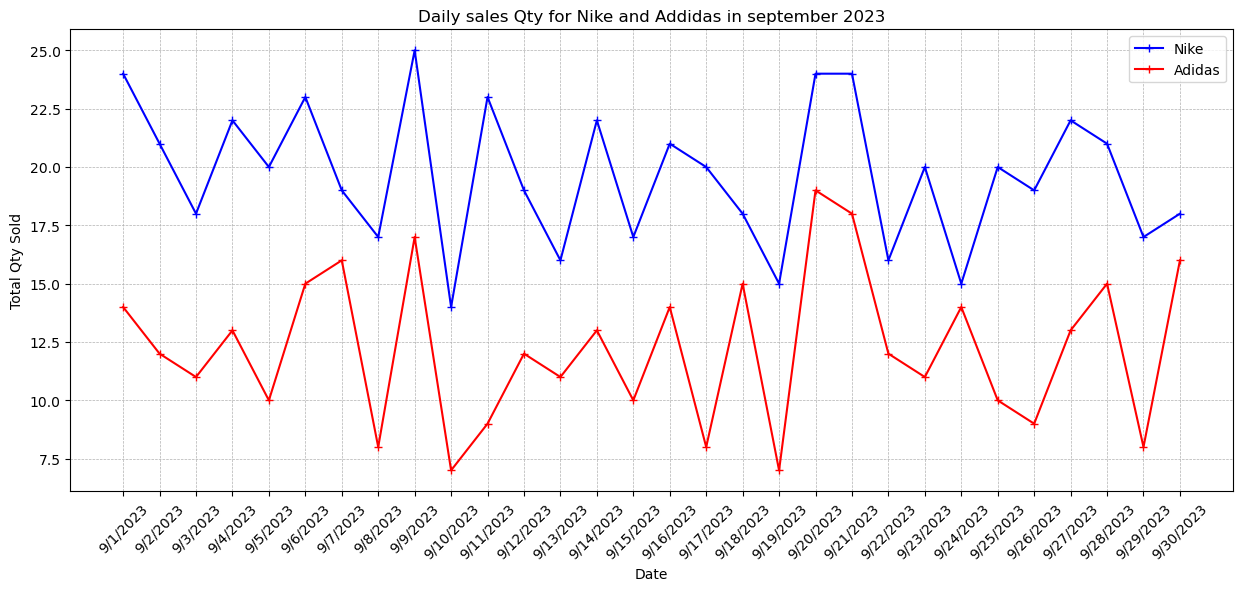

In [56]:
plot_qty()

Now continue --------------

In [48]:
val = round(df_adidas.sold_qty.median())
val

12

In [49]:
df_adidas.sold_qty.replace(689, val, inplace =True)

C:\Users\HP\AppData\Local\Temp\ipykernel_18396\147582080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adidas.sold_qty.replace(689, val, inplace =True)


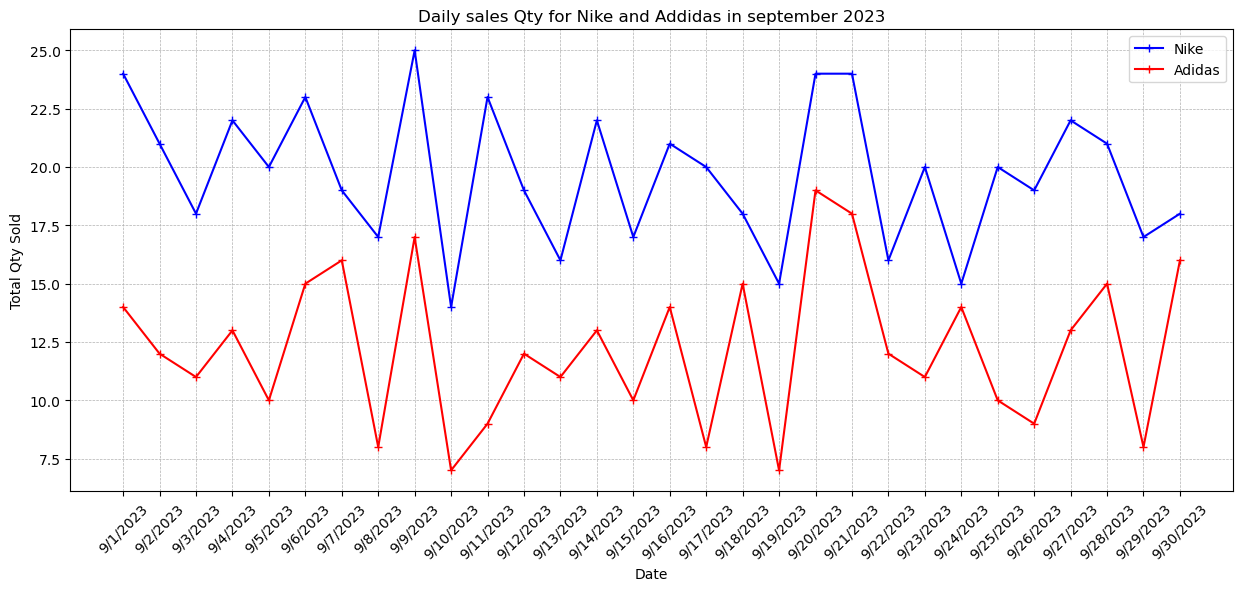

In [57]:
plot_qty()